# Educated Data Analysis (EDA) - Titanic

In this notebook we will conduct and EDA and build models to predict the chance of survival of someone on the titanic.

## Importing the data

In [14]:
# Importing necessary libraries and packages

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import scipy.stats
from sklearn.metrics import confusion_matrix

df = pd.read_excel('../../archive/titanic3.xlsx')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Checking for null values

In [15]:
print(df.columns)
df.isnull().sum()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

decision tree with body and boat
and one without

In [16]:
# Checking the shape (number of smaples)
df.shape

(1309, 14)

1309 is a good amount of datapoints but we will drop age since we cannot predict it, and even if we did, it might give not so accurate predictions.

In [17]:
# What happens if we drop the null values of age since it's not smth to be predicted
df.dropna(subset=['age'], inplace=True)

In [18]:
df.shape

(1046, 14)

We now have 1046 datapoints to look at.

## Encoding categorical variables and more cleaning

In [19]:
# We encode sex and embarked to be able to use them in regressors.
columns_to_encode = ['sex','embarked']
encoded_df = pd.get_dummies(df, columns=columns_to_encode)

In [20]:
encoded_df.head(3)

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,2,NaN,"St Louis, MO",True,False,False,False,True
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",False,True,False,False,True
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False,False,False,True


<img src='../../Images/columns.png'/>

In [21]:
# Checking the null values after dropping the nulls in age
print(encoded_df.columns)
encoded_df.isnull().sum()

Index(['pclass', 'survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'boat', 'body', 'home.dest', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')


pclass          0
survived        0
name            0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin         774
boat          629
body          926
home.dest     361
sex_female      0
sex_male        0
embarked_C      0
embarked_Q      0
embarked_S      0
dtype: int64

The only null we want to get rid of is the fare's null value (which is only 1). As for cabin, boat, body, and home.dest, we will drop the entire columns for these reasons:

- Cabin would've been useful but has too many null values 774/1046.
- Boat means that the person most likely survived. It's labeled in the features dictionary as "LifeBoat (if survived)" since they were on a lifeboat when saved. Using it is not really fair. Plus, it has many null values 629/1046.
- Body means that the person died. It's labeled in the features dictionary as "Body number (if did not survive and body was recovered). Using it is not fair either, and it has a lot of null values 926/1046.
- Home.dest (Home destination) is useless, so we dropped it.

In [22]:
# We drop the one null value in fare
print(encoded_df.shape)
encoded_df.dropna(subset=['fare'], inplace=True)
print(encoded_df.shape)

(1046, 17)
(1045, 17)


In [23]:
# We drop the columns we don't need
columns_to_drop = ['cabin', 'boat', 'body', 'home.dest']
encoded_df.drop(columns=columns_to_drop, axis=1, inplace=True)
print(encoded_df.shape)

(1045, 13)


## Looking at the data more in depth

In [24]:
# Checking the types if they're numerical
encoded_df.dtypes

pclass          int64
survived        int64
name           object
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
sex_female       bool
sex_male         bool
embarked_C       bool
embarked_Q       bool
embarked_S       bool
dtype: object

Let's try finding trends by plotting a pairplot with regression lines. Perhaps we can find any positive or negative correlations with the tareget variable we're gonna be predicting (survived).

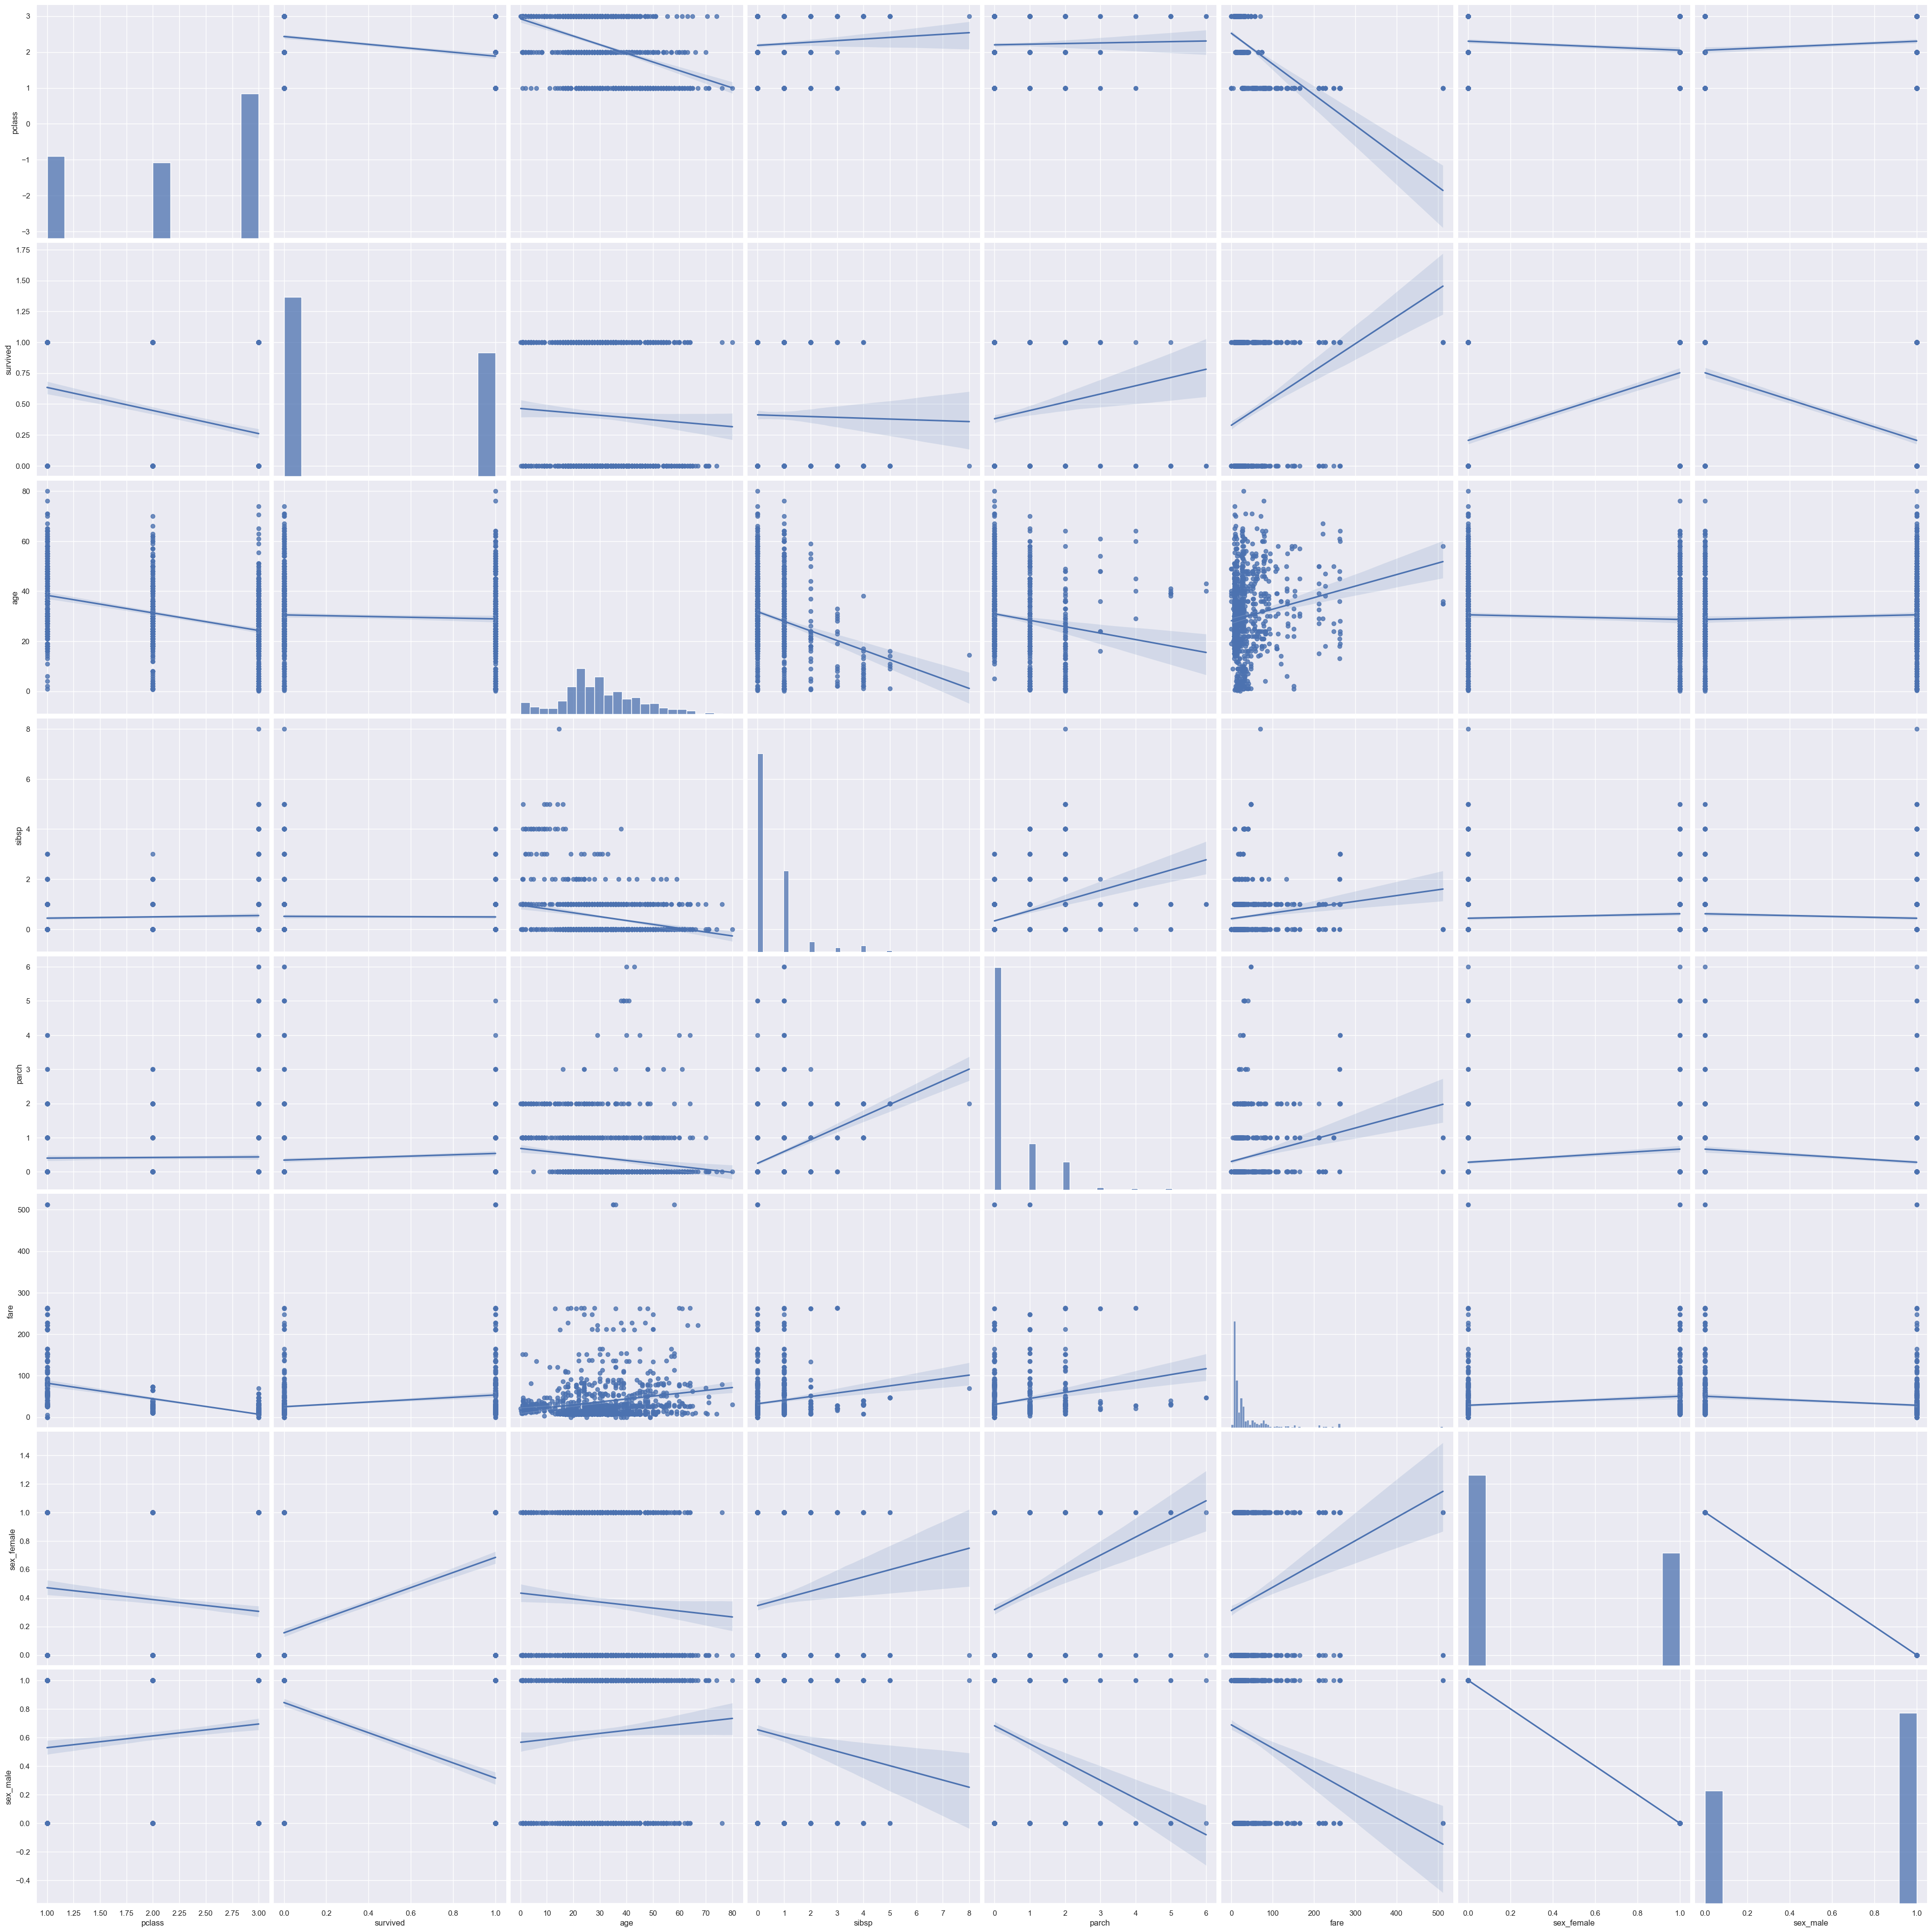

In [25]:
# making a pairplot
d = sns.pairplot(encoded_df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male']], height=5, kind="reg")

Correlations are usually with numerical values, but we will try to find a correlation with the categorical variable "survived". I used GenAI tools like chatgpt to find a way to do so, it suggested point-biserial correlation.

In [26]:
correlation, p_value = scipy.stats.pointbiserialr(encoded_df['pclass'], encoded_df['survived'])
print(f"Point-Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

Point-Biserial Correlation: -0.3199789967887327
P-value: 2.6308545713108013e-26


The Point-Biserial Correlation of -0.32 with a very low p-value (2.63e-26) indicates a strong and statistically significant negative relationship between the variable 'survived' and the variable 'pclass', suggesting that they are inversely related.
This is a great insight as it makes sense that someone in first class would have a higher chance of survival.
Note: The reason it's inverted is cause it treated the pclass numerically as 1,2,3,... whereas we know that 1 is first class so it's higher than 3 which is 3rd class.

Let's make boxplots to get a better understanding of the data.

The median is:  2.0


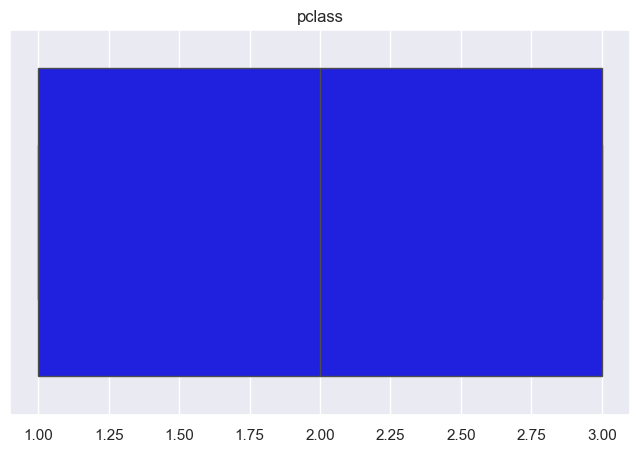

The median is:  28.0


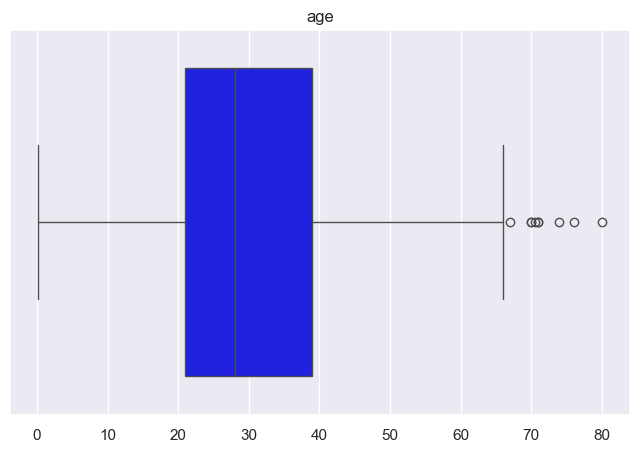

The median is:  0.0


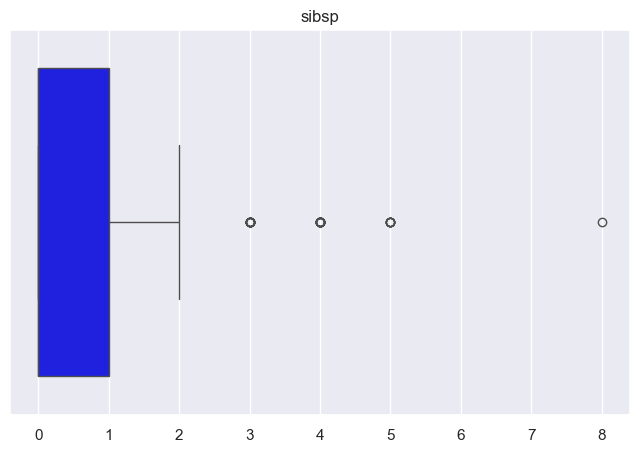

The median is:  0.0


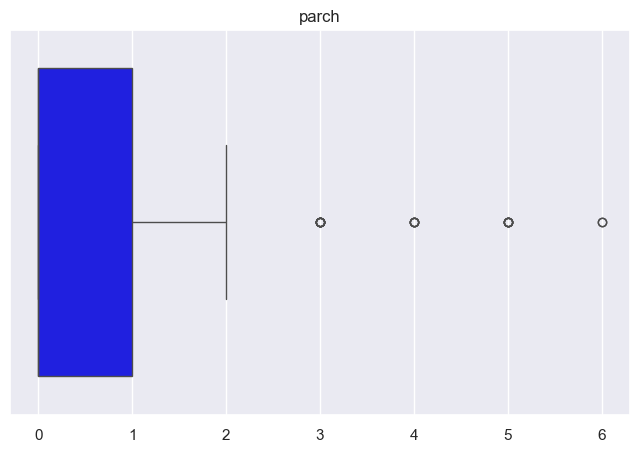

The median is:  15.75


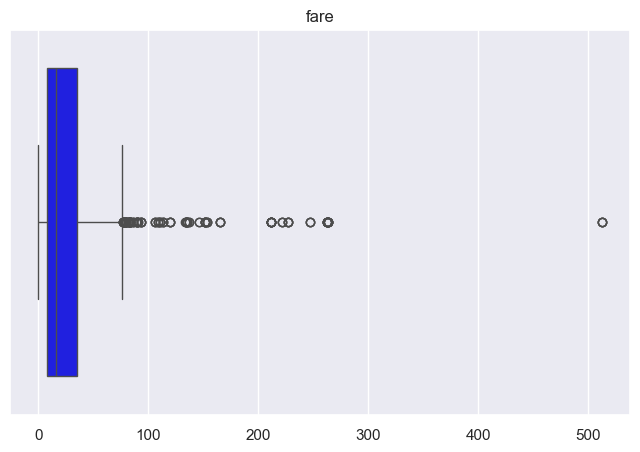

In [27]:
n_variables = ['pclass', 'age', 'sibsp', 'parch', 'fare']
sns.set(rc={'figure.figsize':(8,5)})
for c in n_variables:
    x = encoded_df[c].values
    ax = sns.boxplot(x, orient='h', color= 'blue')
    print('The median is: ', encoded_df[c].median())
    plt.title(c)
    plt.show()


We also make a heatmap to check for correlations between the different features.

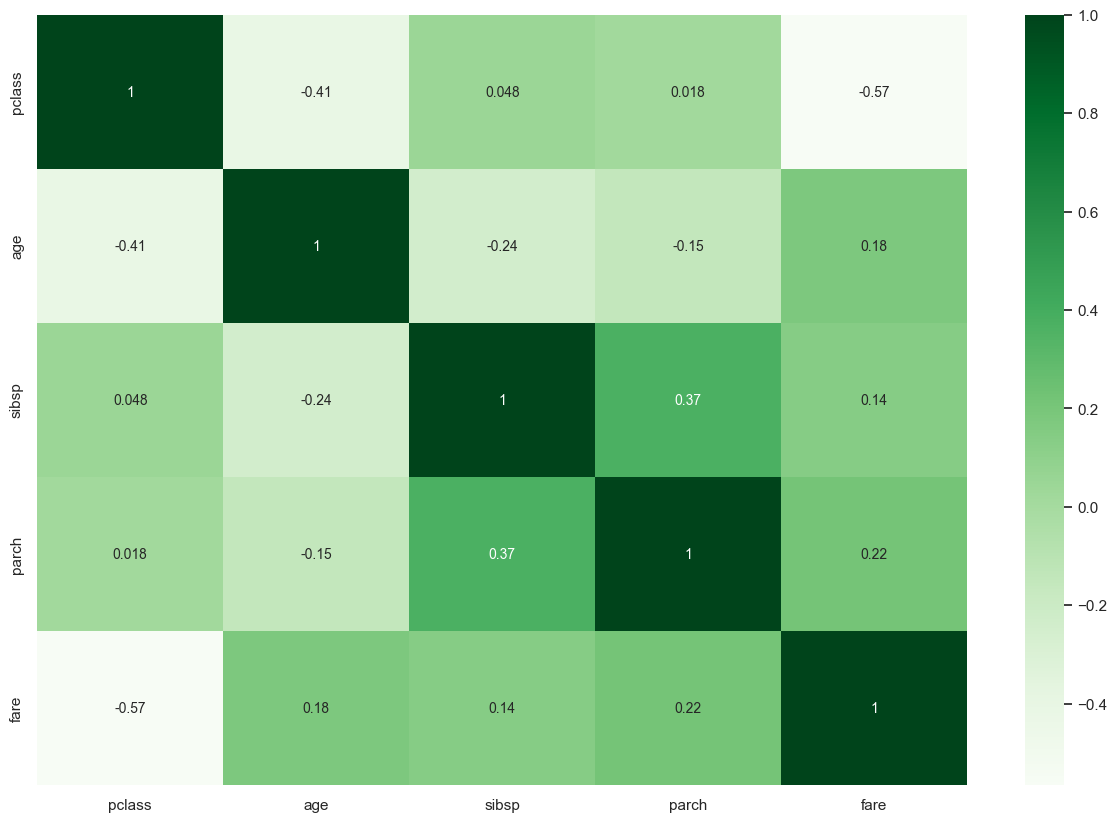

In [28]:
sns.set(rc={'figure.figsize':(15,10)})
pc =  encoded_df[n_variables].corr(method='pearson')
cols = n_variables
ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 10},
                 cmap="Greens")

In [29]:
encoded_df.columns

Index(['pclass', 'survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')